## Time Series

This notebook contains several libraries for Time Series

## Contents
1. Time Series with Pandas
1. Time Series with SciPy

## 1. Time Series with Pandas

In [1]:
c = lambda f: 5/9 * (f-32)

temps = [(f, c(f)) for f in range(0, 101,10)]
temps

[(0, -17.77777777777778),
 (10, -12.222222222222223),
 (20, -6.666666666666667),
 (30, -1.1111111111111112),
 (40, 4.444444444444445),
 (50, 10.0),
 (60, 15.555555555555557),
 (70, 21.11111111111111),
 (80, 26.666666666666668),
 (90, 32.22222222222222),
 (100, 37.77777777777778)]

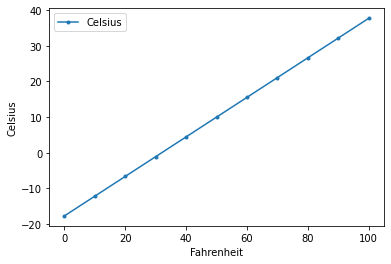

In [3]:
import pandas as pd
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y= 'Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')
axes

## 2. January temperature of New York City

In [25]:
nyc = pd.read_csv('USH00305801-tavg-1-1-1895-2020.csv')

In [26]:
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,28.4,-3.3
2,189701,29.2,-2.5
3,189801,33.7,2.0
4,189901,29.7,-2.0


In [27]:
nyc.columns

Index(['Date', 'Value', 'Anomaly'], dtype='object')

In [28]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']
nyc.head()

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,28.4,-3.3
2,189701,29.2,-2.5
3,189801,33.7,2.0
4,189901,29.7,-2.0


In [29]:
nyc.Date = nyc['Date']/100
nyc.head(3)

,Date,Temperature,Anomaly
0,1895.01,34.2,-3.2
1,1896.01,28.4,-3.3
2,1897.01,29.2,-2.5


In [30]:
pd.set_option('precision', 0) # set to 2 digits behind comma
nyc.describe()

,Date,Temperature,Anomaly
count,125,125,1e+02
mean,1957,25,-7e+00
std,36,31,3e+01
min,1895,-99,-1e+02
25%,1926,28,-3e+00
50%,1957,32,-1e-01
75%,1988,34,3e+00
max,2019,43,1e+01


In [32]:
nyc

,Date,Temperature,Anomaly
0,1895,34,-3e+00
1,1896,28,-3e+00
2,1897,29,-2e+00
3,1898,34,2e+00
4,1899,30,-2e+00
...,...,...,...
120,2015,30,-2e+00
121,2016,34,3e+00
122,2017,38,6e+00
123,2018,32,1e-01


In [33]:
from scipy import stats
linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)

In [34]:
linear_regression.slope

-0.12945929339477724

In [35]:
linear_regression.intercept

277.97473176651295

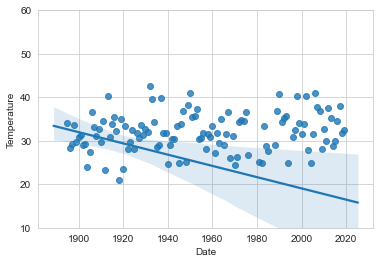

In [38]:
import seaborn as sns
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)
axes.set_ylim(10,60)
axes